<a href="https://colab.research.google.com/github/GaddeVenuGopal/OCR-Text-recognition-with-Python-and-API-ocr.space-/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OCR (Optical character recognition) is the process by which the computer recognizes the text from an image**

ocr.space is an OCR engine that offers free API.
It means that is going to do pretty much all the work regarding text detection. We only need to send through their API an image with the text we want to scan, and it will return us the text scanned. **bold text**

How to use ocr.space API?
First of all, you need to get an API key by registering to their website.

Go on http://ocr.space/OCRAPI and then click on “Register for free API Key”.
Once you have the key, follow the steps below.

1) Import the libraries and load the image
Let’s import all the libraries that we need (Opencv, IO, numpy, requests, json).
IO and Json are by default already installed on python, you should install the other libraries, if you haven’t done it yet.

Then we load the image.

In [1]:
#mounting googledrive to colab
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing neccesary Libraries
import io
import json
import cv2
import numpy as np
import requests
path="/content/drive/MyDrive/MarkManson.jpg"
img = cv2.imread(path,1)
height, width, _ = img.shape
print(img)

[[[219 202 216]
  [201 195 230]
  [187 202 255]
  ...
  [153 186 255]
  [147 168 253]
  [224 223 227]]

 [[197 190 225]
  [105 108 163]
  [ 60  85 179]
  ...
  [ 38  79 212]
  [ 64  96 193]
  [191 197 208]]

 [[190 198 255]
  [ 66  85 182]
  [ 28  70 206]
  ...
  [  6  67 231]
  [ 39  86 207]
  [180 201 228]]

 ...

 [[145 182 255]
  [ 38  82 213]
  [  0  54 208]
  ...
  [  8  50 246]
  [ 45  72 217]
  [189 202 240]]

 [[137 164 251]
  [ 70  98 192]
  [ 46  80 187]
  ...
  [ 53  81 222]
  [ 82 103 208]
  [183 198 224]]

 [[223 218 220]
  [207 204 213]
  [209 209 227]
  ...
  [180 199 226]
  [180 199 214]
  [199 213 209]]]


2). Set the OCR engine
We now have the image and our goal is to send the image to the orc.space server in order to be processed.
 we have the url of ocr.space api where we need to send our image.
 we’re going to compress the image in JPG format. The simple reason for this compression is that using the free service we can send image with maximum 1mb of size, so this compression will shrink the size of our image.
On line 16 we convert the image into bytes. It must be converted to bytes to be sent to the server. **bold text** **bold text**

In [3]:
url_api = "https://api.ocr.space/parse/image"
_, compressedimage = cv2.imencode(".jpg", img, [1, 90])   #compressing the image
file_bytes = io.BytesIO(compressedimage)

**Later we send the bytes to the server using the python library requests.
We need to pass three parameters:

the first is the url_api
Called “Files” which contains the name of the file and the file bytes we generated before after we compressed the image.
And then “Data” which contains the post parameters of the OCR engine.
We need to insert the api key where now it’s written “YOURAPIKEYHERE”, and language is the language of our text. By default is english.
Go on this page http://ocr.space/OCRAPI to see all the “POST parameters” you can use.
The function is going to send the image to the server and in return we’re going to get the response from the server.**

In [4]:
result = requests.post(url_api,
              files = {"MarkManson.jpg": file_bytes},
              data = {"apikey": "d932ab3c6988957",
                      "language": "eng"})
print(result)
print(type(result))

<Response [200]>
<class 'requests.models.Response'>


3) Read the Result
The result from the server is a string.
We’re going first of all to extract the content of result, then we convert the content into a dictionary.

In [5]:
result = result.content.decode()
result = json.loads(result)
print(result)
print(type(result))

{'ParsedResults': [{'TextOverlay': {'Lines': [], 'HasOverlay': False, 'Message': 'Text overlay is not provided as it is not requested'}, 'TextOrientation': '0', 'FileParseExitCode': 1, 'ParsedText': 'THE\r\nSUBTLE\r\nART OF\r\nNOT\r\nGIVING\r\nA F•CK\r\nA COUNTERINTUITIVE APPROACH\r\nTO LIVING A GOOD LIFE\r\nMARK MANSON\r\n', 'ErrorMessage': '', 'ErrorDetails': ''}], 'OCRExitCode': 1, 'IsErroredOnProcessing': False, 'ProcessingTimeInMilliseconds': '734', 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}
<class 'dict'>


*Result contains the text read from the OCR engine plus a few other values. The other values depend from the post parameters we did set before.

For example if we enabled the text Overlay we would get the coordinates with the position of the text in the image.

Now from the result let’s extract only the text as it is our focus on this project:*

In [6]:
parsed_results = result.get("ParsedResults")[0]
text_detected = parsed_results.get("ParsedText")

print(text_detected)
print(type(text_detected))

THE
SUBTLE
ART OF
NOT
GIVING
A F•CK
A COUNTERINTUITIVE APPROACH
TO LIVING A GOOD LIFE
MARK MANSON

<class 'str'>


**Displaying the image**

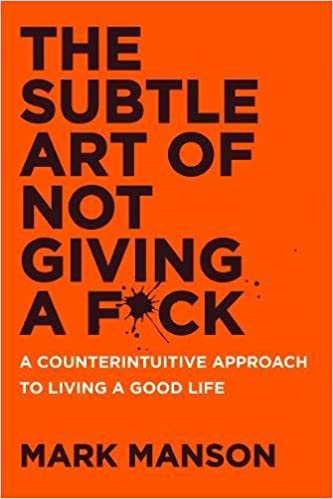

In [7]:

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()